# Introduction
** 분석 포인트 **
1. Kaggle Problem에서 제시하는 Evaluation에 맞춰 제출 값을 조정해준다.
2. Grid parameter를 적용하여 최적의 Model Parameter를 선정한다.

##### 1. Scoring 
   * Kaggle에 제출하는 Score와 Python에서 구한 Score가 동일할 때가 가장 최적의 **Analyzing State** 이다.
        * 이를 위해 필요한것은 sklearn.metrics 의 make_scorer 함수를 사용하여 kaggle에 있는 평가방식에 맞춰 cross_validation에 적용하는것이다.
        * rmsle 검색
    * Scoring을 맞춰 이 값을 **최소(최대)화** 하는것이 분석의 최종 목적
    
##### 2. Data Analyzing Start
   * 데이터 분석의 시작은 **Raw Data 자체**를 꾸준히 보는것이다.
        * 이를 위한 방법으로 여러가지가 있다.
            1. Excel을 위한 방법 ( 오랜시간 Data를 볼 수 있을 때 좋음 )
            2. Python Visualization
            
##### 3. Visualization
   * fig, (axis1,axis2,...) = **plt.subplots**(nrows=1, ncols=2, figsize=(18,4))
        * plt.subplots()를 사용하여 plot의 **배치**, **크기**를 조절한다.
        
   * **sns.countplot**(data= ,x='',ax=) 
        * x를 기준으로 row의 **개수**를 count해준다. x가 "범주형"자료일때 자주 사용된다.
        
   * **sns.barplot**(data=, x=, y=, hue=)
        * x를 기준으로 y값의 **합(평균)** 을 계산해준다. y값이 수치변수 일때 사용하면 좋다.
        
   * **sns.pointplot**(data=, x=, y=, hue=)
        * barplot과 동일하게 사용되지만 **추세**가 있는 data에 사용된다.
        
   * **sns.Facetplot**(data=, hue=)
        * **범주형 data**의 요소들의 비율을 선으로 나타내준다. 범주형 데이터만을 볼때 좋다.
        
   * grid= **sns.FacetGrid**(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
   * grid.**map**(plt.hist, 'Age', alpha=.5, bins=20)
   * grid.**add_legend()**
        * plt.subplots() 후 sns.barplot ~~ 이런 방식이아닌 seaborn함수 내의 plot조정, 설정함수를 사용할 수 도 있다.
        * **중복기준!!!!!** 의 사용에서 용이하다. 위의 예시에서는 Survived 와 Pclass 라는 두 범주형 데이터를 기준으로 hist그램을 그리는데 이때의 x축은 'Age'변수를 사용하는 것이다.
        * x축은 **수치형** y축은 여러개의 **범주형**을 사용 할때 좋다.
        
        
   * 이 모든 방법들에서 중요한것은 단순히 한 data만 보는 것이 아닌 data의 **조작(groupby, apply)**을 통해 효과적인 시각화를 이끌어 내야한다.
    


##### 4. 시간변수, Datetime을 다루는 방법
   * 우선 파일에서 Date Field를 읽을 때는 parse_dates=['datetime']을 사용해야한다.
        * data['datetime'].dt.year(month, dayofweek ...)을 사용가능
   * Datatime은 보통 **종속변수**에 많은 영향을 끼친다. 따라서 year,month,day,hour,minute,second로 값을 나눠 모든 변수를 분석하고 *scoring*하는 것은 중요하다. 

## Bicycle 

* Problem definition   
날짜를 기준으로 몇개의 자전거가 빌려질지 예상하는 문제이다.   
주어진 문제에서는 총 12개의 data field가 주어진다,   
주로 대여날짜, 주말(시간적요소)과 날씨(환경적요소)같은 Field가 주어져있다.   

* Problem solution
우선 주어진 문제에서 평가방식을 살펴보면 Root Mean Squared Logarithmic Error를 사용한다.   
   $\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$
이 방법의 중요한 점은 Log(x)를 채점방식으로 사용했다는 것이다. 이에 맞춘 **data configuration**도 추후 진행할것이다.    


### 제출하는 test set의 평가 방식    

Predict :P   
Action :A   

1. **| P- A |** = Mean absoule Error   

2. **(P-A)^2** = Mena Squared Error   

3. **(squrt(P-A))^2** = Root Mean Squared Error   

4. **log** 를 사용하는 평가방식은 "값" 의 오차(분산)이 매우 넓을 경우에 사용한다.
    * 이때, logX +1 을 해주는데 log를 사용할때 log1 미만에서는 y값이 "음수"가 발생하기 때문이다.

#### Data Fields
* **1. datetime**
    - Evaluation에서 평가될때 이 datetime에 따른 count를 생각한다. 즉, datatime의 값은 count에 큰 영향을 줄 것이다.
* **2. season**
    - 계절적 요인
* **3. holiday**
    -
* **4. workingday**
    -
* **5. weather**  
    - 
* **6. temp**   
    - 
* **7. atemp**    
    - 
* **8. humidity**    
    - 
* **9. windspeed**      
    - 
* **10. casual**       
    - 
* **11. registered**   
    - 
* **12. count**   
    -

### Data Analyzing Process
0. 우선 Data Load -> Preprocessing -> Score 의 기본틀을 만든다.
1. train Data set을 Load후 Data의 Fields를 **직관적**으로 살펴본다.
2. 변수 1개 1개를 **시각화**하면서 살펴본다.
3. 정한 기준에 맞게 변수를 **Encoding** 한다.
4. **Predict** 틀을 만들고 **Submit**한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

seed=37

# Load Data

In [2]:
train = pd.read_csv('train.csv',parse_dates=['datetime'])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
print(test.shape)
train.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Visualization and Explore

### dateime

In [4]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

print(train.shape)
train.head()

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### Explore datetime by Visualization

List of Years =[2011 2012]
List of Month =[ 1  2  3  4  5  6  7  8  9 10 11 12]
List of Day =[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
List of hours =[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
List of minutes =[0]
List of seconds =[0]


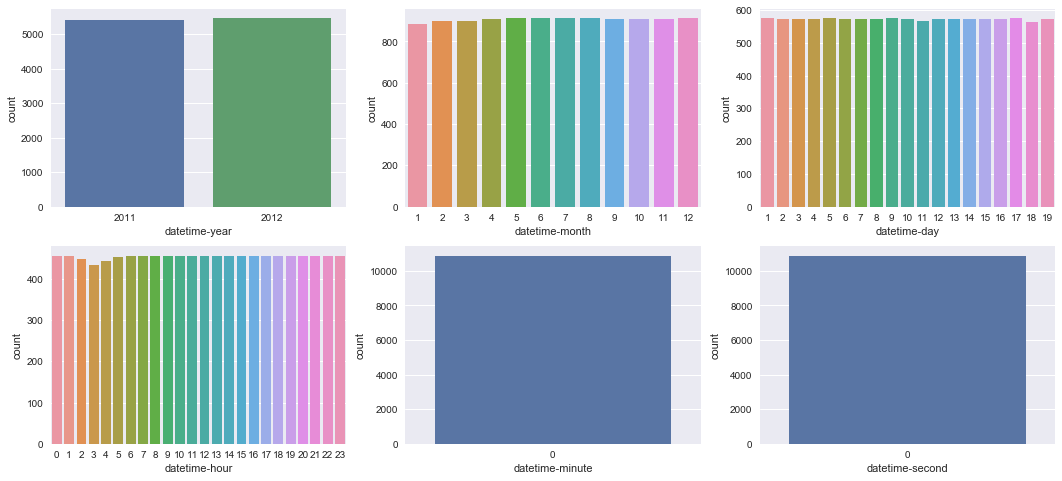

In [5]:
fig, ((axis1, axis2, axis3), (axis4, axis5, axis6)) = plt.subplots(nrows=2, ncols=3, figsize= (18,8))

print('List of Years =' + str(train['datetime-year'].unique())) # unique()로 범주형 data에서 유일한 값만 출력
print('List of Month =' + str(train['datetime-month'].unique()))
print('List of Day =' + str(train['datetime-day'].unique()))
print('List of hours =' + str(train['datetime-hour'].unique()))
print('List of minutes =' + str(train['datetime-minute'].unique()))
print('List of seconds =' + str(train['datetime-second'].unique()))

sns.countplot(data=train, x='datetime-year', ax=axis1)
sns.countplot(data=train, x='datetime-month', ax=axis2)
sns.countplot(data=train, x='datetime-day', ax=axis3)
sns.countplot(data=train, x='datetime-hour', ax=axis4)
sns.countplot(data=train, x='datetime-minute', ax=axis5)
sns.countplot(data=train, x='datetime-second', ax=axis6)
# countplot() 는 x축을 기준으로 dataframe에서 몇개의 row(value)를 가지고 있는지 나타내준다.

#### 'Datetime' Learned

1. 연도, 달, 일자, 시간 별로 count의 큰차이는 보이지 않는다.
2. datetime-minute 과 datetime-second는 모든 value가 0 으로 분석의 가치가 없다.
3. datetime-day의 field 가 **(0~19)** 뿐이다. 이는 train data와 test data를 일자를 기준으로 나눴다고 생각할 수 있다.
    * 따라서 datetime-day column을 model시키면 **OverFitting**이 발생할 것이다.

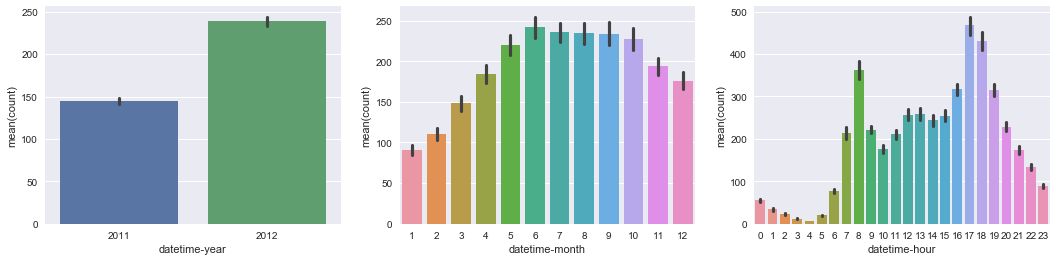

In [6]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3 , figsize=(18,4))

sns.barplot(data=train, x='datetime-year', y='count' ,ax= axis1)
sns.barplot(data=train, x='datetime-month', y='count', ax= axis2)
sns.barplot(data=train, x='datetime-hour', y='count',ax= axis3)

# barplot은 기본적인 bar 그래프이다. x값(범주형)에 대해 y값(연속형) 데이터의 mean을 출력해준다.

#### 'Datetime' Learned2

1. 2011년도 보다 2012년에 더 많은 자전거 대여가 이루어 졌다.
2. 여름철 (5~10)이 겨울철 보다 상대적으로 많은 대여가 이루어진다.
3. 주로 아침시간(**출근시간**)과 퇴근시간(**17~18**)에 대여가 빈번히 일어난다.

### Explore 'Datetime' (Year and Month) 
* In Fiture seeking page, Data should be **splited** as possible as small and should be dealed by **grouping** thinking

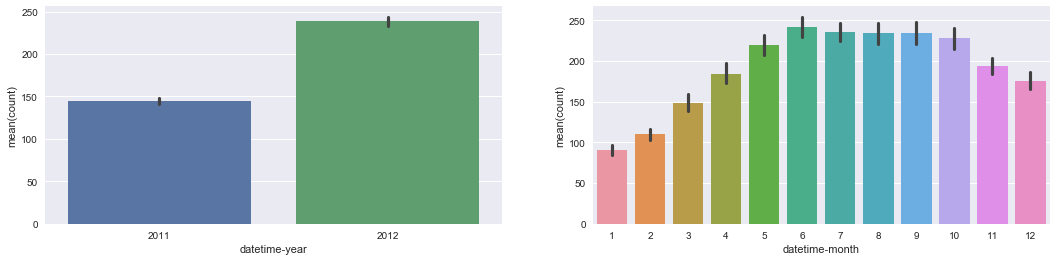

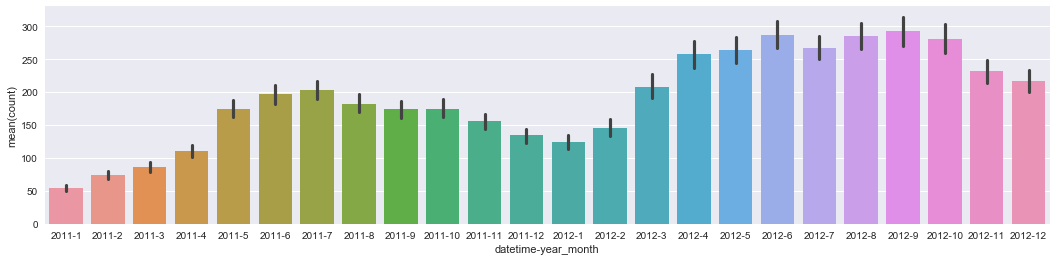

In [7]:
fig, (axis1, axis2) = plt.subplots(1,2 ,figsize=(18,4))

sns.barplot(data=train, x='datetime-year', y='count', ax=axis1)
sns.barplot(data=train, x='datetime-month', y='count', ax=axis2)

train['datetime-year_month'] = train['datetime'].apply(lambda dt: str(dt.year) + "-" + str(dt.month))
# apply()는 train['datetime']의 각 row(value) 하나씩에 함수를 적용시켜준다.
# datetime field 전체에 str()를 적용해주면 이상한 모양으로 문자열을 변형 시키기 때문에 apply로 각 value마다 str()을 적용시킨다,

fig, axis3 = plt.subplots(figsize=(18,4))

sns.barplot(data=train, x='datetime-year_month', y='count', ax=axis3)

#### 'datetime-year_month' learned
1. 1월과 2월의 차이가 크다고 판단할 수 있지만, 실제로는 2011년과 2012년의 전체적인 값의 차이라 볼 수 있다.
2. 또한 7월에 value가 떨어진다 판단할 수 있지만, 실제로는 2012년에만 value가 떨어졌다.
3. 2011년과 2012년 모두 한 year안에서 month 별 value의 흐름이 있다고 볼 수 있다. 하지만, 전체적으로 봤을때 1월과 2월이라서 항상 value가 작다고는 볼 수 없다. ( 2012년의 1,2월이 2011년 12월보다 value가 크기 때문에 **model의 error 야기** )

### Explore 'datetime-year, month / "Hour"! 

In [8]:
def bin_hour(hour):
    if hour<=7:
        return "others"
    elif hour <= 12:
        return "morning"
    elif hour <= 17:
        return "afternoon"
    elif hour <= 22:
        return "night"
    else:
        return "others"

train['datetime-bin_hour'] = train['datetime-hour'].apply(bin_hour)

print(train.shape)
train.head()

(10886, 20)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-year_month,datetime-bin_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,2011-1,others
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,2011-1,others
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,2011-1,others
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,2011-1,others
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,2011-1,others


In [ ]:
fig, (axis1,axis2) = plt.subplots(2,1, figsize=(24,12))

sns.pointplot(data=train, x='datetime-month', y='count', hue='datetime-bin_hour', ax=axis1)
sns.pointplot(data=train, x='datetime-year_month', y='count', hue='datetime-bin_hour', ax=axis2)

#### 'datetime- Hour! ' learned
1. 새벽 시간대 ( 22~07시 에는 자전거 이용빈도가 많이 떨어진다. )
2. month 만 봤을때는 night 이용이 morning 보다 높지만 전체적으로 봤을때 항상 그런것은 아니다.
3. 2011년도와 2012년도에 달마다 변화하는 양상이 조금 다르다.
  * 2012년도 2~4월은 오후에 count가 급격하게 상승하나, 2011년은 그렇지 않다.
  * 2012년도 7월은 오후에 count가 급격하게 하락하나, 2011년은 그렇지 않다.
  * 2011년도 7월은 아침에 count가 변동이 없으나, 2012년은 하락한다.
  * 2012년도 11월은 저녁에 count가 급격하게 하락하나, 2011년은 그렇지 않다.

### Explore Hour / Woring Day + DayofWeek(주말,주중)

In [ ]:
days = {0: 'Monday', 1: 'Tuesday', 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

train['datetime-dayofweek'] = train['datetime'].dt.dayofweek
train['datetime-dayofweek'] = train['datetime-dayofweek'].apply(lambda day: days[day])
# 숫자형 data인 dt.dayofweek를 문자열로 변경시키는 방법 
# Dictionary 자료형을 이용하기!!!!!!!!!

figures, (ax1, ax2, ax3) = plt.subplots(nrows=3)
figures.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)

#### 'datetime- dayofweek' learned
1. Working Day에 따른 자전거 대여 양상이 뚜렷하게 차이난다.
     * **Working day : 1**은 평일인데 이때는 (6~9 / 16~18) 시의 대여량이 많다.
     * **Working day : 0**은 주말인데 오후시간(12~16) 시의 대여량이 높은것을 확인가능하다.
     
2. 요일마다의 대여양상도 비슷해 보이는데 몇가지 차이를 찾아낼 수 있다.
    * Friday는 평일이지만 Working day와 비슷한 양상을 띈다. 그다음은 Monday가 영향을 받는다.
    * 일요일과 토요일을 비교했을때 토요일이 더 높은 대여율을 보인다.

### Explore Count
* Label ficture이 되는 Count의 모양을 변형시켜 model 에 더 정확한 값을 얻을 수 있다.
* 가장 기본이 되는 분포 모양은 **가우시안 분포** 로 _실상황_ 에서 일반적이라 생각되는 분포이다.

C:\Users\Moon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


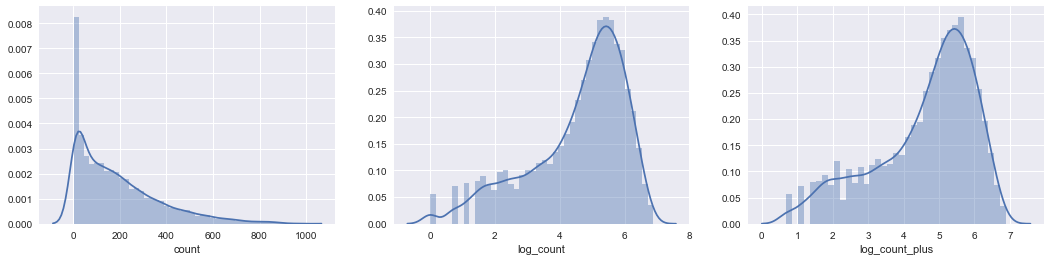

In [11]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(18,4))

train['log_count'] = np.log(train['count'])
train['log_count_plus'] = np.log(train['count']+1)

sns.distplot(train['count'], ax=axis1)
sns.distplot(train['log_count'], ax=axis2)
sns.distplot(train['log_count_plus'], ax=axis3)

# Preprocessing

### Merge data to Combi

In [31]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [32]:
combi = pd.concat([train, test])

print(combi.shape)
combi.head()

(17379, 12)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


### Data Featuring

#### datetime

In [33]:
combi['datetime-year'] = combi['datetime'].dt.year
combi['datetime-month'] = combi['datetime'].dt.month
combi['datetime-day'] = combi['datetime'].dt.day
combi['datetime-hour'] = combi['datetime'].dt.hour
combi['datetime-minute'] = combi['datetime'].dt.minute
combi['datetime-second'] = combi['datetime'].dt.second

print(combi.shape)
combi[['datetime','datetime-year','datetime-month','datetime-day','datetime-hour','datetime-minute','datetime-second']].head()

(17379, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


#### year+month

In [34]:
combi['datetime-year_month'] = combi['datetime'].apply(lambda dt: str(dt.year) + '-' + str(dt.month))

year_month = pd.get_dummies(combi['datetime-year_month'], prefix="datetime-year_month").astype(np.bool)
print(year_month.shape)

(17379, 24)


In [35]:
combi2 = combi.copy()

In [42]:
combi = pd.concat([combi2, year_month], axis=1)
print(combi.shape)
combi.head()

(17379, 43)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,datetime-year_month_2012-11,datetime-year_month_2012-12,datetime-year_month_2012-2,datetime-year_month_2012-3,datetime-year_month_2012-4,datetime-year_month_2012-5,datetime-year_month_2012-6,datetime-year_month_2012-7,datetime-year_month_2012-8,datetime-year_month_2012-9
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,...,False,False,False,False,False,False,False,False,False,False
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,...,False,False,False,False,False,False,False,False,False,False
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,...,False,False,False,False,False,False,False,False,False,False
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,...,False,False,False,False,False,False,False,False,False,False
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,...,False,False,False,False,False,False,False,False,False,False


#### dayofweek

In [44]:
dayofweek = combi['datetime'].dt.dayofweek
dayofweek = pd.get_dummies(dayofweek, prefix='datetime-dayofweek').astype(np.bool)

In [45]:
combi2= combi.copy()

In [47]:
combi = pd.concat([combi2, dayofweek], axis=1)
print(combi.shape)
combi.head()

(17379, 50)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,datetime-year_month_2012-7,datetime-year_month_2012-8,datetime-year_month_2012-9,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,...,False,False,False,False,False,False,False,False,True,False
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,...,False,False,False,False,False,False,False,False,True,False
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,...,False,False,False,False,False,False,False,False,True,False
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,...,False,False,False,False,False,False,False,False,True,False
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,...,False,False,False,False,False,False,False,False,True,False


#### bin_time

In [50]:
def bin_hour(hour):
    if hour <= 7:
        return 0
    elif hour <= 15:
        return 1
    elif hour <= 21:
        return 2
    else:
        return 0
    
    
combi['datetime-bin_hour'] = combi['datetime-hour'].apply(bin_hour)
bin_hour_dummies = pd.get_dummies(combi['datetime-bin_hour'], prefix='datetime-hour_bin').astype(np.bool)
print(bin_hour_dummies.shape)

(17379, 3)


In [51]:
combi2 = combi.copy()

In [54]:
combi = pd.concat([combi2, bin_hour_dummies],axis=1)
print(combi.shape)
combi.head()

(17379, 54)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,datetime-bin_hour,datetime-hour_bin_0,datetime-hour_bin_1,datetime-hour_bin_2
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,...,False,False,False,False,True,False,0,True,False,False
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,...,False,False,False,False,True,False,0,True,False,False
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,...,False,False,False,False,True,False,0,True,False,False
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,...,False,False,False,False,True,False,0,True,False,False
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,...,False,False,False,False,True,False,0,True,False,False


### Split data to Train/Test

In [55]:
train = combi[combi['count'].notnull()]

print(train.shape)
train.head()

(10886, 54)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,datetime-bin_hour,datetime-hour_bin_0,datetime-hour_bin_1,datetime-hour_bin_2
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,...,False,False,False,False,True,False,0,True,False,False
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,...,False,False,False,False,True,False,0,True,False,False
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,...,False,False,False,False,True,False,0,True,False,False
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,...,False,False,False,False,True,False,0,True,False,False
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,...,False,False,False,False,True,False,0,True,False,False


In [111]:
test = combi[combi['count'].isnull()]

print(test.shape)
test.head()

(6493, 54)


,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,datetime-bin_hour,datetime-hour_bin_0,datetime-hour_bin_1,datetime-hour_bin_2
0,11.365,NaN,NaN,2011-01-20 00:00:00,0,56,NaN,1,10.66,1,...,False,False,True,False,False,False,0,True,False,False
1,13.635,NaN,NaN,2011-01-20 01:00:00,0,56,NaN,1,10.66,1,...,False,False,True,False,False,False,0,True,False,False
2,13.635,NaN,NaN,2011-01-20 02:00:00,0,56,NaN,1,10.66,1,...,False,False,True,False,False,False,0,True,False,False
3,12.880,NaN,NaN,2011-01-20 03:00:00,0,56,NaN,1,10.66,1,...,False,False,True,False,False,False,0,True,False,False
4,12.880,NaN,NaN,2011-01-20 04:00:00,0,56,NaN,1,10.66,1,...,False,False,True,False,False,False,0,True,False,False


# Scoring

In [80]:
train.columns

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'season', 'temp', 'weather', 'windspeed', 'workingday',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-year_month',
       'datetime-year_month_2011-1', 'datetime-year_month_2011-10',
       'datetime-year_month_2011-11', 'datetime-year_month_2011-12',
       'datetime-year_month_2011-2', 'datetime-year_month_2011-3',
       'datetime-year_month_2011-4', 'datetime-year_month_2011-5',
       'datetime-year_month_2011-6', 'datetime-year_month_2011-7',
       'datetime-year_month_2011-8', 'datetime-year_month_2011-9',
       'datetime-year_month_2012-1', 'datetime-year_month_2012-10',
       'datetime-year_month_2012-11', 'datetime-year_month_2012-12',
       'datetime-year_month_2012-2', 'datetime-year_month_2012-3',
       'datetime-year_month_2012-4', 'datetime-year_month_2012-5',
       'datetime-year_month_2012-6

In [77]:
bin_hour_dummies.columns

Index(['datetime-hour_bin_0', 'datetime-hour_bin_1', 'datetime-hour_bin_2'], dtype='object')

In [117]:
feature_names = train.columns
feature_names = list(feature_names)

remove_content =['casual','registered','count','datetime-year', 'datetime-month','datetime',
                 'datetime-day', 'datetime-minute', 'datetime-second', 'datetime-year_month',
                'datetime-bin_hour']
for x in remove_content:
    feature_names.remove(x)
    
label_name= 'count'

In [118]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 43)


,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,datetime-hour,datetime-year_month_2011-1,...,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,datetime-hour_bin_0,datetime-hour_bin_1,datetime-hour_bin_2
0,14.395,0,81,1,9.84,1,0.0,0,0,True,...,False,False,False,False,False,True,False,True,False,False
1,13.635,0,80,1,9.02,1,0.0,0,1,True,...,False,False,False,False,False,True,False,True,False,False
2,13.635,0,80,1,9.02,1,0.0,0,2,True,...,False,False,False,False,False,True,False,True,False,False
3,14.395,0,75,1,9.84,1,0.0,0,3,True,...,False,False,False,False,False,True,False,True,False,False
4,14.395,0,75,1,9.84,1,0.0,0,4,True,...,False,False,False,False,False,True,False,True,False,False


### Convert label(Count) into log(Count +1)
* Evaluation에 맞게 score을 계산하므로 model을 만들때 y_train(count에 값들)도 Evaluation에 맞게 변형시켜줘야한다.

In [119]:
y_train = np.log(train[label_name]+1)

print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [120]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 43)


,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,datetime-hour,datetime-year_month_2011-1,...,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6,datetime-hour_bin_0,datetime-hour_bin_1,datetime-hour_bin_2
0,11.365,0,56,1,10.66,1,26.0027,1,0,True,...,False,False,False,True,False,False,False,True,False,False
1,13.635,0,56,1,10.66,1,0.0000,1,1,True,...,False,False,False,True,False,False,False,True,False,False
2,13.635,0,56,1,10.66,1,0.0000,1,2,True,...,False,False,False,True,False,False,False,True,False,False
3,12.880,0,56,1,10.66,1,11.0014,1,3,True,...,False,False,False,True,False,False,False,True,False,False
4,12.880,0,56,1,10.66,1,11.0014,1,4,True,...,False,False,False,True,False,False,False,True,False,False


### 평가 방식에 맞는 scoring 함수 적용하기
$\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$

In [121]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference) # 제곱함수
    difference = np.mean(difference) # 전체합 / N = mean
    
    score = np.sqrt(difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

### 머신러닝 scoring 적용

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

# make model
model = RandomForestRegressor(random_state=seed)

# score
score = cross_val_score(model, X_train, y_train,scoring=rmsle_score, cv=20).mean()

print('score is {score: .5f}' .format(score=score))

score is  0.44376


## Find Optimal Parameters

머신러닝 model들의 tunining을 하는 방법 : **Hyper Parameter**   
   hyper parameter 이란?   
인공지능 조차 자동으로 찾을 수 없는 parameter들을 사용자 들이 값을 지정해서 model을 향상시키는 방법

_**장점**_    
    * 모든 도메인, 지식, 기술에 적용가능하다.
    
_**단점**_   
    * 별로 많은 값이 오르지는 않는다.
    
** sklearn.ensemble.RandomForestRegressor **  
1. n_estimations = 트리의 개수 
    * 특징 : 높으면 높을수록 좋다, 
    * But) 속도의 증가 So, 어느 수준 이상에서는 많이 올라가지 않는다.
    
2. max_feature='auto' :선택하는 feature의 개수 
    * 특징 : 높을수록 training set에 너무 적합한 model이 형성된다. 
    * But) 너무 많이하면 test set에 맞지않는 Model 이형성된다.
    
Grid Search는 optimal을 찾는 것은아니다. Why? parameter의 범위를 사람들이 정해줘야하기 때문이다.   
**Grid Search-Random Search** But) 돌리다보면 어느정도 parameter들의 범위가 나온다.(Score을 기준으로) 하나씩 구해지는 기준에따라 범위를 정해놓고 First Search -> Second Search -> Final Search를 돌리면 Optimal parameter를 구할 수 있다.

### Case1 : Grid Search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators = 300
max_depth_list = [1,3, 10, 30, 50, 100]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

grid_parameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth,
                                     max_features=max_features,
                                     n_jobs=-1, # 자동으로 가지치기를 하지않는다(?)
                                     random_state = seed)
        
        score = cross_val_score(model, X_train, y_train, scoring=rmsle_score, cv=20).mean()
        
        print('n_estimators = {0}, max_depth = {1:2}, max_features ={2}, Score(RMSLE) ={3: .6f}' \
             .format(n_estimators,max_depth,max_features, score))
        
        parameter = {
            'n_estimators' : n_estimators,
            'max_depth' : max_depth,
            'max_features' : max_features,
            'score' : score
        }
        
        grid_parameters_list.append(parameter)
        
grid_parameters_list = pd.DataFrame.from_dict(grid_parameters_list)
# list를 dataFrame형태로 변경한다. 이때 기준은 dict로 사용 왜냐하면 list의 각 요소는 dict형태이기 때문에
grid_parameters_list.sort_values('score', ascending=True, inplace=True)
# dataFrame의 정렬에서는 sort_values을 사용하여 'score' field를 기준으로 정렬

grid_parameters_list.head(10)

### Case2 : Random Search(First)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

num_epoch = 100
coarse_parameters_list = []

n_estimators = 300

for epoch in range(num_epoch):
    np.random.seed(epoch)
    max_depth = int(np.random.uniform(1, 100))
    
    np.random.seed(epoch)
    max_features = np.random.uniform(0.1, 1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=seed,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, scoring=rmsle_score, cv=20).mean()

    print("epoch = {0:2}, n_estimators = {1}, max_depth = {2:2}, max_features = {3:.6f}, Score(RMSLE) = {4:.5f}"\
          .format(epoch, n_estimators, max_depth, max_features, score))

    parameters = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
        'score': score,
    }

    coarse_parameters_list.append(parameters)
    
coarse_parameters_list = pd.DataFrame.from_dict(coarse_parameters_list)
coarse_parameters_list.sort_values('score', ascending=True, inplace=True)

coarse_parameters_list.head(10)

In [ ]:
# Coarse search 결과, 다음의 범위 안에 optimal parameter가 있다는 사실을 찾을 수 있다.
minimum_max_depth = 30
maximum_max_depth = 60

minimum_max_features = 0.4
maximum_max_features = 0.6

### Case2-2 Random Search(Final)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

num_epoch = 100
finer_parameters_list = []

n_estimators = 300

for epoch in range(num_epoch):
    np.random.seed(epoch)
    max_depth = int(np.random.uniform(minimum_max_depth, maximum_max_depth))

    np.random.seed(epoch)
    max_features = np.random.uniform(minimum_max_features, maximum_max_features)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=seed,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, scoring=rmsle_score, cv=20).mean()

    print("epoch = {0:2}, n_estimators = {1}, max_depth = {2:2}, max_features = {3:.6f}, Score(RMSLE) = {4:.5f}"\
          .format(epoch, n_estimators, max_depth, max_features, score))

    parameters = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
        'score': score,
    }

    finer_parameters_list.append(parameters)

finer_parameters_list = pd.DataFrame.from_dict(finer_parameters_list)
finer_parameters_list.sort_values('score', ascending=True, inplace=True)

finer_parameters_list.head(10)

### User hyperparameter above

In [128]:
from sklearn.ensemble import RandomForestRegressor

#optimal_hyperparameters = finer_parameters_list.iloc[0]

n_estimators = 300
#max_depth = optimal_hyperparameters["max_depth"]
max_depth = 46
# max_features = optimal_hyperparameters["max_features"]
max_features = 0.509763

model = RandomForestRegressor(n_estimators=n_estimators,
                              max_depth=max_depth,
                              max_features=max_features,
                              random_state=seed,
                              n_jobs=-1)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=46,
           max_features=0.509763, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

In [129]:
from sklearn.cross_validation import cross_val_score

%time score = cross_val_score(model, X_train, y_train, scoring=rmsle_score, cv=20).mean()

print("Score = {score:.5f}".format(score=score))

Wall time: 1min 11s
Score = 0.41450


## Submit

In [133]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

## 가우시안 분포에 맞게 수정한 label(=count)를 원래대로 돌려논다.
predictions = np.exp(predictions)-1

print(predictions.shape)
predictions[:3]

(6493,)


array([ 9.82090217,  4.88287482,  3.17337132])

In [134]:
submission = pd.read_csv('sampleSubmission.csv')

submission['count'] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.820902
1,2011-01-20 01:00:00,4.882875
2,2011-01-20 02:00:00,3.173371
3,2011-01-20 03:00:00,3.083532
4,2011-01-20 04:00:00,2.542391


In [135]:
from datetime import datetime

current_date = datetime.now()
current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

description = "Bicycle_result1"

filename = "{date}_{score:.5f}_{desc}.csv".format(date=current_date, score=score, desc=description)
filepath = "{filename}".format(filename=filename)

submission.to_csv(filepath, index=False)